In [55]:
import os
import sys
import glob
import numpy as np
from tqdm import trange
from astropy.io import fits
from astropy.table import Table, vstack
from astropy.convolution import convolve, Gaussian1DKernel
import astropy.units as u
import astropy.coordinates as coord
import matplotlib
import matplotlib.pyplot as plt
from astropy.table import Column
from tqdm import trange
import pandas as pd
import fitsio
from astropy.table import Table, vstack
from astropy import units as u
from astropy.coordinates import SkyCoord
from easyquery import Query, QueryMaker
from scipy.stats import binomtest
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, BoundaryNorm
import h5py
from astropy.cosmology import Planck18
import glob
from matplotlib.lines import Line2D

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

rootdir = '/global/u1/v/virajvm/'
sys.path.append(os.path.join(rootdir, 'DESI2_LOWZ/desi_dwarfs/code'))

from desi_lowz_funcs import make_subplots, match_c_to_catalog, print_radecs
from desi_lowz_funcs import calc_normalized_dist
from desi_lowz_funcs import find_objects_nearby
from construct_dwarf_galaxy_catalogs import process_sga_matches
from desi_lowz_funcs import sdss_rgb


In [56]:
import cmasher as cmr

In [57]:
##read in the sga cat!!

In [85]:
sga_dwarf_cat = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_SGA_GOOD_matched_dwarfs.fits")

In [61]:
len(sga_dwarf_cat)

5468

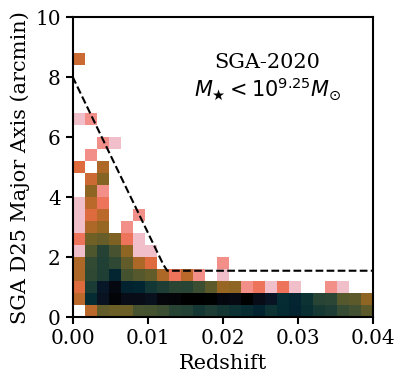

In [60]:
fig,ax = make_subplots(ncol =1, nrow =1, return_fig=True)

# Define slope and intercept for the line from (0,8) to (0.0125,1.53)
zreds = np.linspace(0,0.05,100)
x0, y0 = 0.0, 8.0
x1, y1 = 0.0125, 1.53
slope = (y1 - y0) / (x1 - x0)
intercept = y0  # Since x0 = 0
# Calculate the boundary value
boundary_val = slope * zreds + intercept
# Apply the cutoff at zred = 0.0125
img_size_arcmin = np.where(zreds > 0.0125, 1.53, boundary_val)

ax[0].hist2d(sga_dwarf_cat["Z"], 2* sga_dwarf_cat["SGA_SMA_SB25"]/60, bins= 25, 
             range= ( (0,0.04), (0,10) ), cmap = cmr.dusk_r, norm=LogNorm(), rasterized=True)

ax[0].plot(zreds, img_size_arcmin, color = "k",ls = "--")

ax[0].set_xlim([0,0.04])
ax[0].set_ylim([0,10])

ax[0].set_xlabel("Redshift",fontsize = 15)
ax[0].set_ylabel("SGA D25 Major Axis (arcmin)",fontsize = 15)

ax[0].text(0.65, 0.8, r"SGA-2020" "\n" r"$M_{\bigstar} < 10^{9.25} M_{\odot}$",fontsize = 15,ha="center",
          transform=ax[0].transAxes, va="center" )

plt.savefig("plots/sga_d25_plots.pdf",bbox_inches="tight")

plt.show()

In [64]:
shred_cat = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/desi_y1_dwarf_shreds_catalog_v4.fits")
clean_cat = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/desi_y1_dwarf_clean_catalog_v4.fits")

In [26]:
shred_cat[shred_cat["TARGETID"] == 39633236166444587]["FILE_PATH"]

/pscratch/sd/v/virajvm/redo_photometry_plots/all_deshreds/north/sweep-160p045-170p050/1695p492/BGS_BRIGHT_tgid_39633236166444587


In [75]:
bad_rchisq_mask = (shred_cat["RCHISQ_G"] > 50) | (shred_cat["RCHISQ_R"] > 50) | (shred_cat["RCHISQ_Z"] > 50)

In [84]:

# print_radecs(shred_cat[bad_rchisq_mask]["RA","DEC"], ra="RA",dec="DEC",num=500)

In [72]:
# print_radecs(clean_cat[clean_cat["Z"] < 0.006]["RA","DEC"], ra="RA",dec="DEC",num=500)

In [82]:
decompose_maskbits_pow2(2304)

[8, 11]

In [92]:
sga_dwarf_cat["RA","DEC","TARGETID"][:5]

RA,DEC,TARGETID
deg,deg,
float64,float64,int64
44.52738479095238,0.8022786355569983,39627803594851186
44.24610687004703,1.2318595370418177,39627815666064976
46.548355256515286,1.59167463246331,39627821747798958
42.10867023687664,2.567226984030377,39627845831495642
42.26345063508889,2.4317462704185573,39627845835686385


In [91]:
sga_dwarf_cat[sga_dwarf_cat["TARGETID"] ==  39627821747798958]["FILE_PATH"]



/pscratch/sd/v/virajvm/redo_photometry_plots/all_sga/south/sweep-040p000-050p005/0466p015/SGA_tgid_39627821747798958


In [ ]:
# /pscratch/sd/v/virajvm/redo_photometry_plots/all_sga/south/sweep-040p000-050p005/0466p015/SGA_tgid_39627821747798958